# Bank Churn Prediction

## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary
* **RowNumber**: Row number.
* **CustomerId**: Unique identification key for different customers.
* **Surname**: Surname of the customer
* **Credit Score**: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* **Geography**: The country to which the customer belongs.
* **Gender**: The gender of the customer.
* **Age**: Age of the customer.
* **Tenure**: The period of time a customer has been associated with the bank.
* **Balance**: The account balance (the amount of money deposited in the bank account) of the customer.
* **NumOfProducts**: How many accounts, bank account affiliated products the person has.
* **HasCrCard**: Does the customer have a credit card through the bank?
* **IsActiveMember**: Subjective, but for the concept
* **EstimatedSalary**: Estimated salary of the customer.
* **Exited**: Did they leave the bank after all?


# Summary of Steps:

* Reading Dataset and Feature Elimination
    - Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning

* Perform an Exploratory Data Analysis on the data
    - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive

* Illustrate the insights based on EDA
    - Key meaningful observations from Bivariate analysis

* Data Pre-processing
    - Split the target variable and predictors - Split the data into train and test - Rescale the data

* Model building
    - Build Neural Network

* Model Performance Improvement
    - Comment on which metric is right for model performance evaluation and why? - Find the optimal threshold using ROC-AUC or Precision-Recall curves - Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements - Include all the model which were trained to reach at the final one

* Model Performance Evaluation
    - Evaluate the model on different performance metrics and comment on the performance and scope of improvement

* Conclusion and key takeaways
    - Final conclusion about the analysis

### Before Getting Started
* This is a classification problem
* This will be based on probablilites to predict whether customers exited or left the bank
* We will build a neural network model and tune it until we find a good performing model

### Import Libraries

In [265]:
# Import Core Libraries
import pandas as pd
import numpy as np
from numpy import argmax

# Import Libs for Data Visualization
# Set up matplotlib to work interactively
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Import Deep Learning Libs
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras import backend as K


# Import Model Tuning Methods and Model Selection libs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Activate Autocomplete
%config IPCompleter.greedy=True

In [266]:
# Display the version of Tensor Flow Being Uses
print(tf.__version__)

2.5.0


In [267]:
# ---Use Default before launching when working on gpu 
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [268]:
# The data set is stored on my Google Drive
# I will add a piece of code to allow Google Colab to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
# Load the dataset info a panda dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deep Learning - Bank Churn Prediction/bank.csv')

In [270]:
# Import Datasets
# df = pd.read_csv('bank.csv')

In [271]:
# Display the first few records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Insights
* The data has a combination of types Integer, Float, and Object 
* Premiliminary analysis, it does not look like the data has any null values

In [273]:
# Do a Statistical Summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Display the shape

In [274]:
# Check the shape
df.shape

(10000, 14)

##### Insights
The original dataset has 14 columns and 10k records

#### Check for null values

In [275]:
# Check for null values
df.isnull().values.any()

False

#### Check for Duplicate Data in the dataset

In [276]:
# Check for duplicate rows
duplicate = df[df.duplicated()]
duplicate

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [277]:
# Check for duplicate customer ids to see if 
# there are multiple records per customers
duplicate = df[df.duplicated(subset=['CustomerId'])]  
duplicate

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


#### Insights
**Duplicates**
* There are no duplicate rows in the dataset
* There are no multiple occurences of customers in the data
* We can conclude that the data does not have any duplicate values

**Irrelevant Features**
* We have three columns that do not add any value to the model. They are very unique to each customer. The first one is a sequence, the second is a customer ID, and the last is the customer last name
    - 'RowNumber'
    - 'CustomerId'
    - 'Surname'

In [278]:
# Drop meaningless columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [279]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Insights
* The data has now meaningful features. However, we cannot yet feed the data into the model as it still has objects in the dataset. 
* Columns Geography and Gender have strings and we will apply Hot Encoding to convert them to numbers
* The reason we will use One Hot Encoding over Label Encoding is because there is no order in the data. In other words, the data is not ordinal, so One Hot Encoding is more appropriate in this case

In [280]:
# Checking for bad or meaningless data
for column in df.columns:
    if(df[column].dtype=='int64' or df[column].dtype=='float64'):
        print(column, " has values between ", df[column].min(), " and ", df[column].max())

CreditScore  has values between  350  and  850
Age  has values between  18  and  92
Tenure  has values between  0  and  10
Balance  has values between  0.0  and  250898.09
NumOfProducts  has values between  1  and  4
HasCrCard  has values between  0  and  1
IsActiveMember  has values between  0  and  1
EstimatedSalary  has values between  11.58  and  199992.48
Exited  has values between  0  and  1


In [281]:
# Checking for bad or meaningless data
for column in df.columns:
    if(df[column].dtype=='object'):
        print(df[column].value_counts(),'\n')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Male      5457
Female    4543
Name: Gender, dtype: int64 



In [282]:
# Checking for bad or meaningless data
for column in df.columns.difference(['CreditScore','Age','Balance','EstimatedSalary']):
    if(df[column].dtype=='int64' or df[column].dtype=='float64'):
        print(df[column].value_counts(),'\n')

0    7963
1    2037
Name: Exited, dtype: int64 

1    7055
0    2945
Name: HasCrCard, dtype: int64 

1    5151
0    4849
Name: IsActiveMember, dtype: int64 

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64 

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64 



<p><b>Insight:</b></p>
<li>By doing a quick analysis on all columns min and max values, it looks so far that Experience has invalid values. The dataframe has 52 rows with negative Experience numbers that are invalid</li>
<li>There are no null values in the data frame</li>
<li>There are 5 categorical columns</li>

### EDA: Univariate and Bivariate Analysis
<br/>
<li>Number of unique in each column?</li>
<li>Number of people that existed the bank</li>
<li>Number of people with zero credit card spending per month?</li>
<li>Value counts of all categorical columns.</li>
<li>Univariate and Bivariate</li>
<li>Get data model ready</li>

In [283]:
# Checking the number of unique values in each column
for column in df.columns:
    print("The number of unique values in column "
          ,column, " is: ", df[column].nunique())

The number of unique values in column  CreditScore  is:  460
The number of unique values in column  Geography  is:  3
The number of unique values in column  Gender  is:  2
The number of unique values in column  Age  is:  70
The number of unique values in column  Tenure  is:  11
The number of unique values in column  Balance  is:  6382
The number of unique values in column  NumOfProducts  is:  4
The number of unique values in column  HasCrCard  is:  2
The number of unique values in column  IsActiveMember  is:  2
The number of unique values in column  EstimatedSalary  is:  9999
The number of unique values in column  Exited  is:  2


<p><b>Insigths</b></p>
- The data on CCAvg, Mortgage, and Income is skewed but no need to treat it. The bank is supposed to have skewed applicants. If we treat the data here, it will increase bias

### Categorical Encoding

* Since both Gender and Geography are not Ordinal, we will use One Hot Encoding over Label Encoding

In [284]:

replaceStruct = {"Geography": {"France": 1, "Spain": 2 , "Germany": 3},
                "Gender": {"Male": 1, "Female":2}}
                
                    
oneHotCols=["Geography","Gender"]


In [285]:
# Perform One Hot Encoding to convert strings into numbers
# Since strings cannot be processed by the model
# All dataset features have to be numbers s
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols,drop_first=True)
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_2,Geography_3,Gender_2
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,1,0,0
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,0


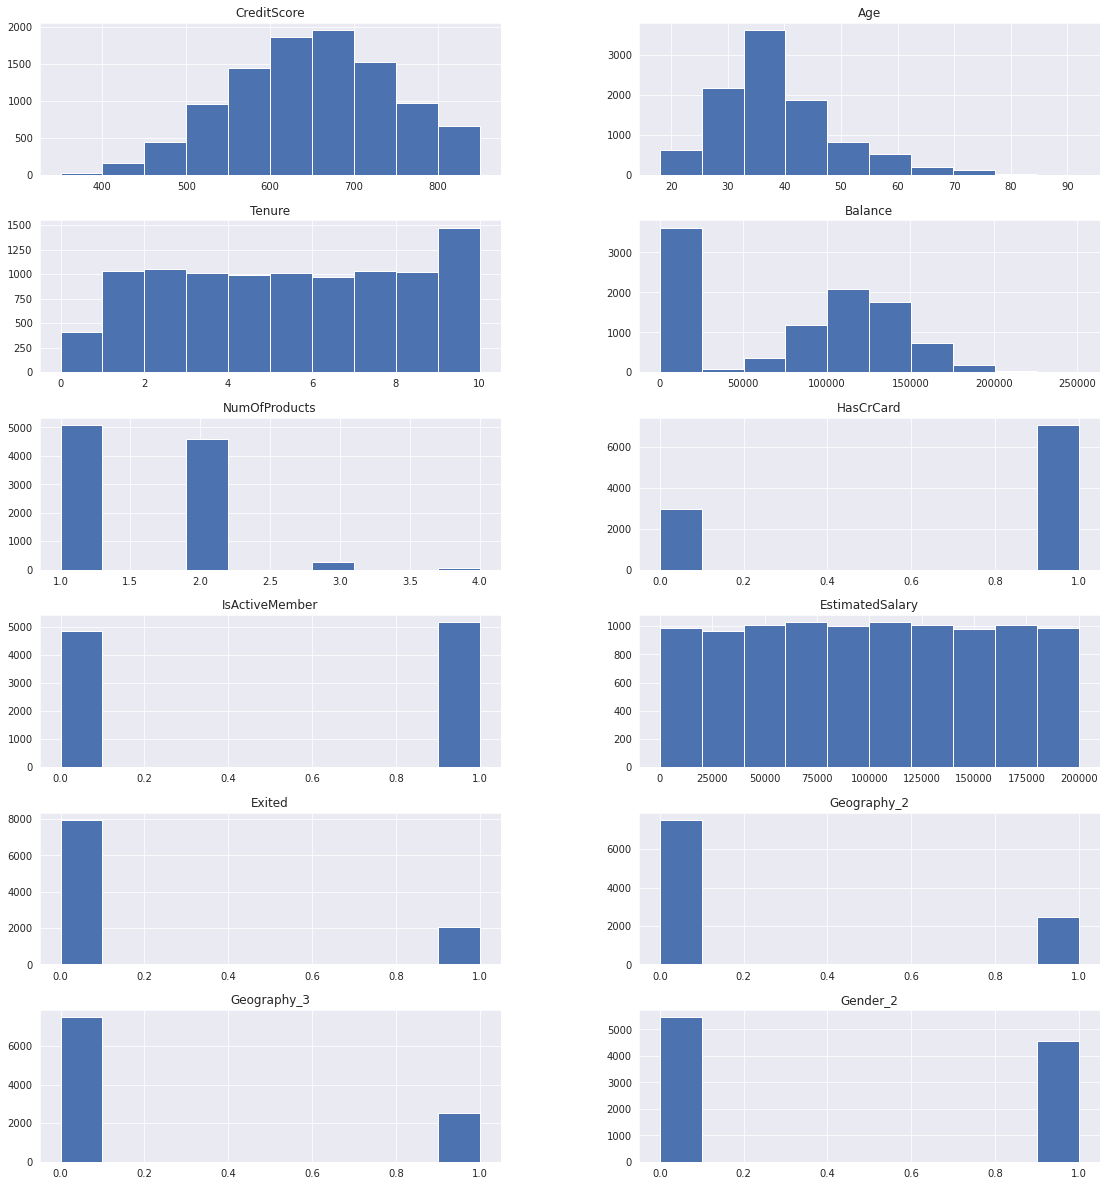

In [286]:
# Univariate Plotting
# Excluding ID and Outcome Columns
df[df.columns].hist(stacked=False, figsize=(19,50), layout=(14,2)); 

#### Main Insigth
* The first thing that jumps here is the fact that the data is not balanced. The number of customers that have left the bank or exited are around 20%
* The minority class here is the customers that existed or left the bank. Due to their low number in the dataset, the model will not likely learn to predict the number of customers correctly 
* We will take a look at the recall, precision, and ROC-AUC scores to figure out if this will need to be adjusted
* There are more male customers than females


#### Other Insights
* Majority of customers have a credit score between 600 and 700
* Majority of customers are between the age of 35 to 40
* A large number of customers have a balance up to 2500 Dollars in their bank account
* There are almost equal number of customers that are considered active and inactive
* The customers are almost equally distributed across all three regions, France, Germany, and Spain

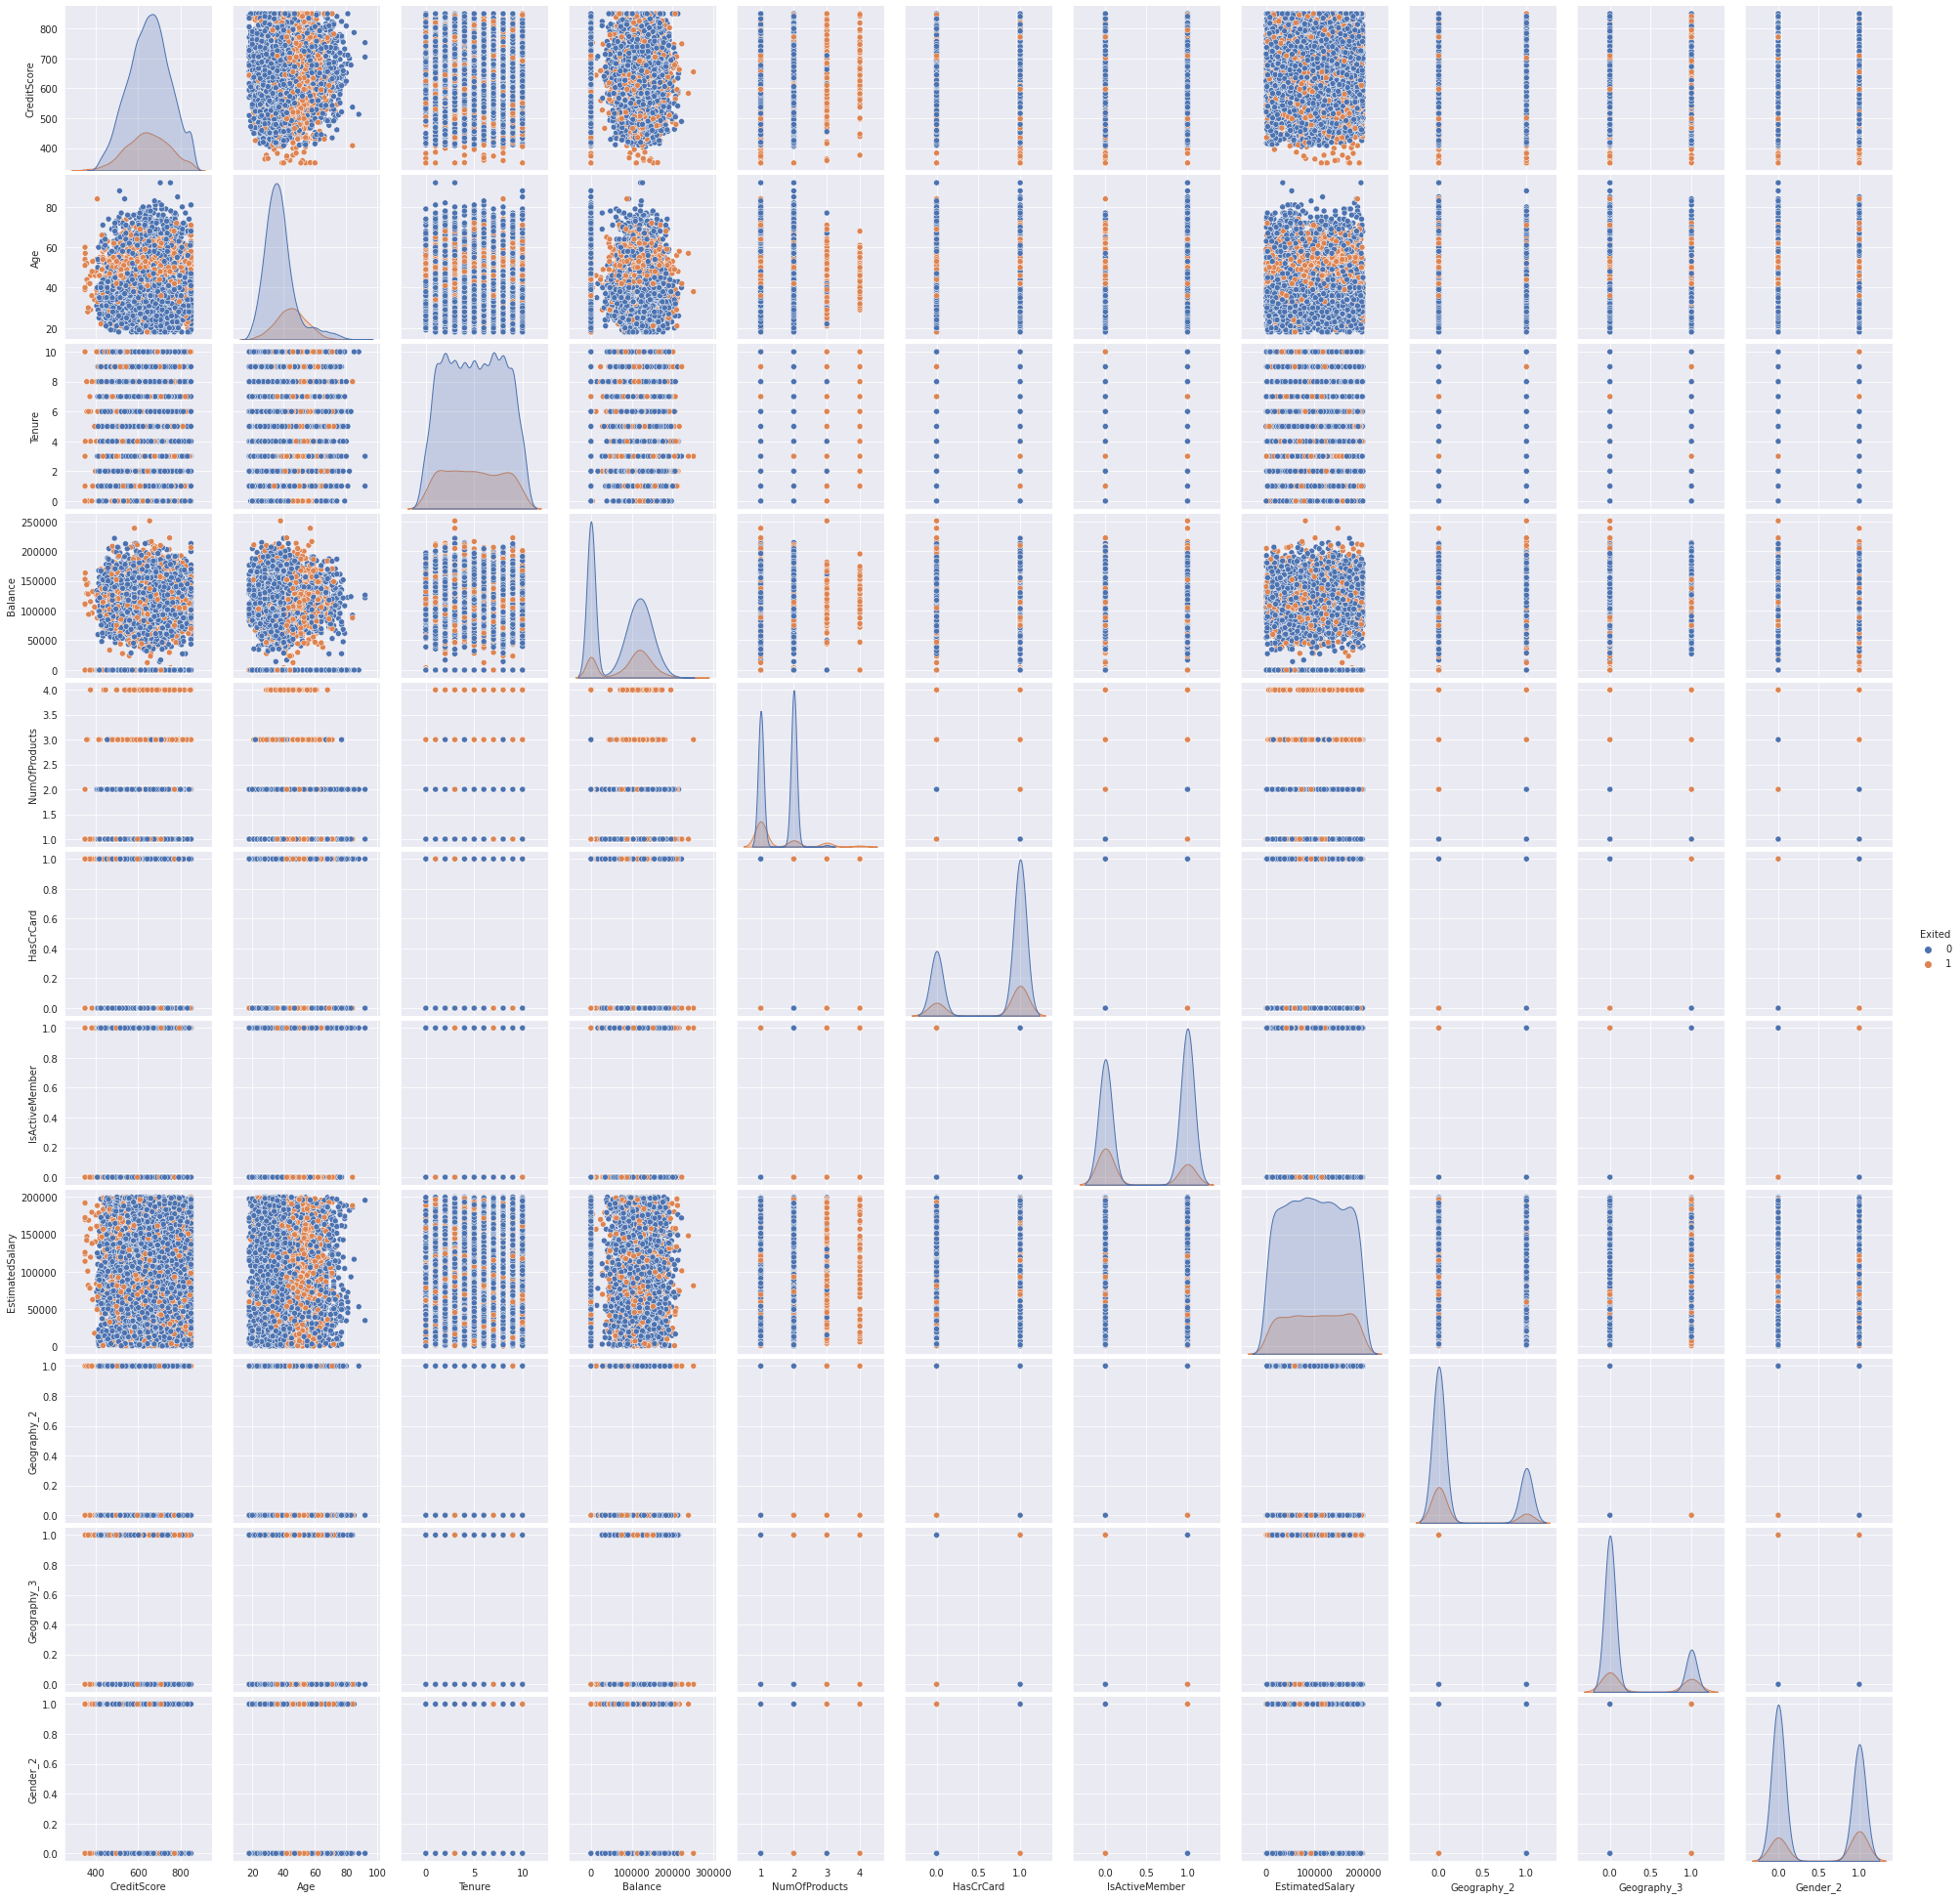

In [287]:
# Bivariate Analysis
sns.set({'figure.figsize':(20,20)})
sns.pairplot(df, hue='Exited')

In [288]:
# Get the Model Ready
# Identify the Correlation between the data
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_2,Geography_3,Gender_2
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.004780,0.005538,0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.001685,0.046897,0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.003868,-0.000567,-0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.134892,0.401110,-0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.009039,-0.010419,0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.013480,0.010577,-0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.016732,-0.020486,-0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.006482,0.010297,0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.052667,0.173488,0.106512
Geography_2,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.052667,1.000000,-0.332084,-0.016889


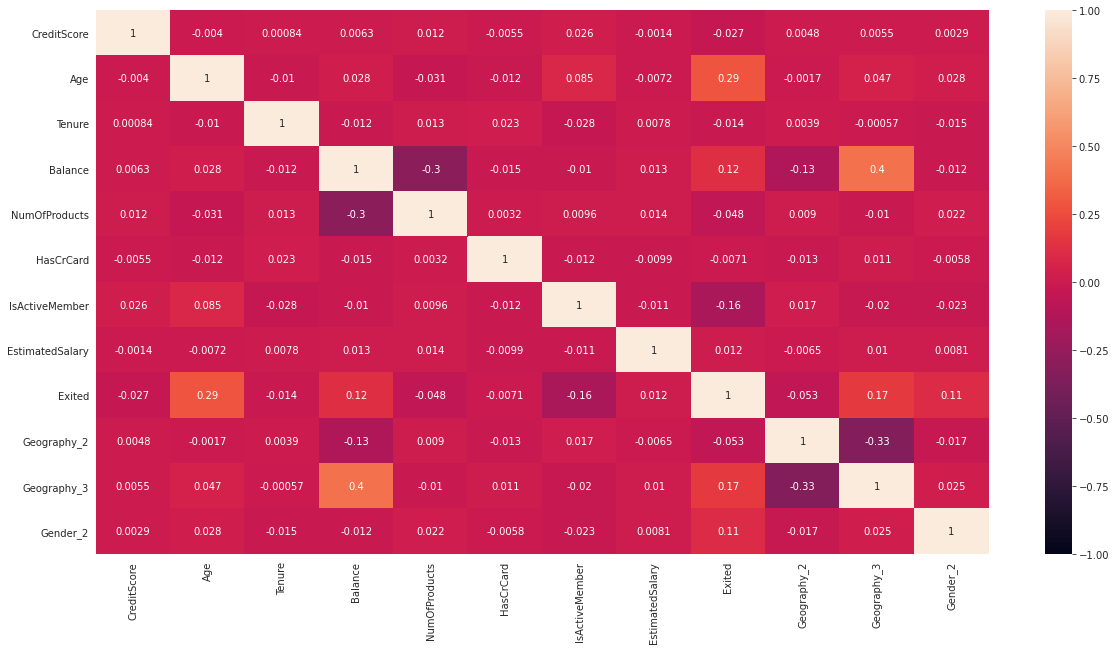

In [289]:
sns.set({'figure.figsize':(20,10)})
sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True)

#### Insights
* Customers that have a larger number of products seem to have a larger rate of customers that exited compared to lower number of products
* Customers with middle age seem to have a larger rate of customers that exited compared to other age groups regardless of their credit score
* By analyzing the correlation between the different features, it seems that there are no significant correclation between all of them

## Data Pre-processing

#### Split the Data
Split the data into training and test set in the ratio of 70:30 respectively

In [290]:
# Segragate the features from the class
X=df.drop('Exited',axis=1)

# Specify the target labels and flatten array
y= df.Exited
flattened_y = np.ravel(y)




In [291]:
# Display the shape of the flattened class
flattened_y.shape

(10000,)

In [292]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, flattened_y, test_size=0.30, random_state=42)



In [293]:
print("Original Exited True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Exited'] == 1]), (len(df.loc[df['Exited'] == 1])/len(df.index)) * 100))
print("Original Exited False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Exited'] == 0]), (len(df.loc[df['Exited'] == 0])/len(df.index)) * 100))
print("")
print("Training Exited True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Exited False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Exited True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Exited False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Exited True Values    : 2037 (20.37%)
Original Exited False Values   : 7963 (79.63%)

Training Exited True Values    : 1453 (20.76%)
Training Exited False Values   : 5547 (79.24%)

Test Exited True Values        : 584 (19.47%)
Test Exited False Values       : 2416 (80.53%)



#### Scale The Data

In [294]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [295]:
# Display the shapes of the test and train sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


## Deep Neural Network
#### **Building the Model**
* We are going to start off with random deep neural model parameters
* In this instance, we will choose to start off with three layers, the input layer, hidden layer, and an output layer.
* We will then look at the model performance, loss, accuracy, precision, and recall
* Will continue adjusting the model as we go until we are satisfied with the performance of the model

#### **Initialize Model Evaluation Functions**

In [296]:
# defining list of models
models = {}
    
models['Model'] = []
models["Accuracy on test set"] = []
models["Recall on test set"] = []
models["Precision on test set"] = []
models["F-Score on test set"] = []

In [297]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [298]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def set_score(models, modelName, model, flag=True):
    
    y_predicted_classes = model.predict_classes(X_test, batch_size=200, verbose=0)
    models['Model'].append(modelName)
    models["Accuracy on test set"].append(str(model.evaluate(X_test,y_test)[1]))
    models["Recall on test set"].append(str(recall_score(y_test,y_predicted_classes)))
    models["Precision on test set"].append(str(precision_score(y_test, y_predicted_classes)))
    models["F-Score on test set"].append(str(f1_score(y_test,y_predicted_classes)))

    if(flag==True):
      print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))
      print('Recall_score: ' + str(recall_score(y_test,y_predicted_classes)))
      print('Precision_score: ' + str(precision_score(y_test, y_predicted_classes)))
      print('F-score: ' + str(f1_score(y_test,y_predicted_classes)))

In [299]:
# Keras model object can be created with Sequential class
model = Sequential()

#### Adding Layers

In [300]:
# Will add layers into the model as mentioned above
# One hidden layer, and one output layer
model.add(Dense(50, input_shape = (11,), activation = 'elu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#### Model Compiling and Optimizers
* We will compile the model before training it
* We will also choose the loss function as the binary_crossentropy
* We will choose Adam as out optimizer function

In [301]:
  model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

#### Model Summary

In [302]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 50)                600       
_________________________________________________________________
dense_45 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 41        
Total params: 2,681
Trainable params: 2,681
Non-trainable params: 0
_________________________________________________________________


#### Insights
* Here we can see that the model was created with three layers as defined
* We can also see the output shape and order of each layer (Input, hidden, then output)
* We can specify any number of layers and neurons, but we chose to start off simple and see how well the model performs

#### **Training the model**
The training will involve both Forward pass and Backpropagation


In [303]:
history = model.fit(X_train, y_train,epochs=3, validation_split = 0.2, batch_size=1, verbose=1)

Epoch 1/3
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3992 - accuracy: 0.8346 - val_loss: 0.3704 - val_accuracy: 0.8471
Epoch 2/3
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3631 - accuracy: 0.8484 - val_loss: 0.3590 - val_accuracy: 0.8464
Epoch 3/3
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3563 - accuracy: 0.8521 - val_loss: 0.3554 - val_accuracy: 0.8436


#### **Model Performance Metric**
Type II errors are more important than Type I errors for the following reason: To explain this, let's list out the confusion matrix scenarios:

TP: Model accurately predicted that the customer left the bank <br/>
FP: Model falsely predicted that the customer left the bank<br/>
TN: Model accurately predicted that the customer did not leave the bank<br/>
FN: Model falsely predicted that the customer did not leave the bank.<br/>
In this case, what matters is to identify as many customers as possible that will truly leave the bank. Hence, the false negative rate should be minimized where the model fails to identify customers who will leave the bank. So Type II error needs to be minimized<br/>

False positives, in this case, are less important than the false negatives since they only impact the efficiencies of the remediation plan whereas the false negatives are more costly if they are missed, the bank will lose on opportunities to remediate the actual root cause of the problem<br/>

By looking at both formulas:<br/>
Precision = TP / (TP + FP)<br/>
Recall = TP / (TP + FN)<br/>

I will give more emphasis on recall as the performance metric for this problem than precision or accuracy since we want to try to keep the FN to a minimum and thus maximize the recall

#### **Evaluation**

In [304]:
results = model.evaluate(X_test, y_test)


94/94 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8613


In [305]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.3339051604270935, 0.8613333106040955]


#### Confusion Matrix
* Display the confusion matrix
* Calculate the model scores: precision, recall, F1-score

In [306]:
y_predicted_classes = model.predict_classes(X_test, batch_size=200, verbose=0)
set_score(models,"Original",model)
confusion_matrix(y_test, y_predicted_classes)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8613
Accuracy Model1 (Dropout): 0.8613333106040955
Recall_score: 0.4811643835616438
Precision_score: 0.7131979695431472
F-score: 0.574642126789366


array([[2303,  113],
       [ 303,  281]])

In [307]:
print(classification_report(y_test, y_predicted_classes, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.71      0.48      0.57       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



#### **Optimal Threshold**

Best Threshold=0.347792, F-Score=0.612


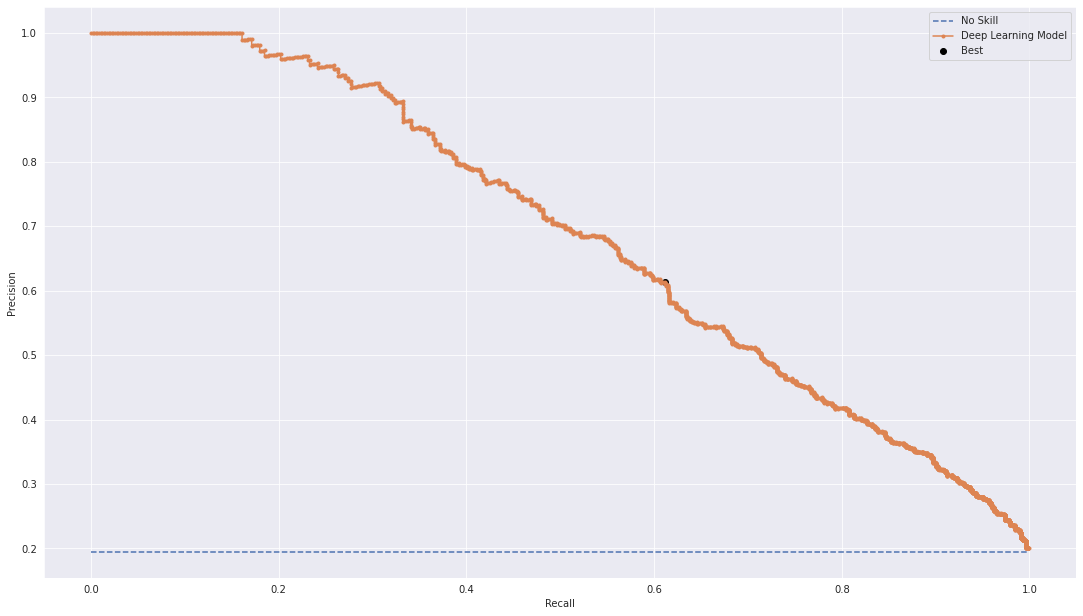

In [308]:
# predict class values
y_predicted = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)

print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))


# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Deep Learning Model')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# show the plot
plt.show()

#### Insights
* The model is performing poorly on the positive classification (1) compared to the negative classification (0)
* This is expected as the data is imbalanced as there are 80% of data corresponding to class "0" vs only 20% data for class "1"
* The model as we mentioned in few sections above that it will not likely learn to predict that customers left the bank correctly
* The Best threshold=0.291 and F-Score=0.598


#### **Attempting to Improve Model**
* Let's attempt to improve the model trying few things listed below. We will do them sequentially one by one and see how each impact the model performance:
1. Add more hidden layers
2. Try different optimizer and use a lower learning rate for the Stochastic Gradient Descent optimizer (SGD)
3. Change the number of neurons and batch number
4. Increase the number of Epochs
5. Changing from binary_crossentropy loss function to a custom focal loss
6. Changing Class Weights to give importance to minority class
7. Finally, we can utilize grid search and random search CV to try to find the best combination of hyperparameters

#### **Adding More Layers**

In [309]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()



In [310]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 50)                600       
_________________________________________________________________
dense_48 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_49 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 31        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________


In [311]:
history = model.fit(X_train, y_train,epochs=3, validation_split = 0.2, batch_size=1, verbose=1)

Epoch 1/3
5600/5600 [==============================] - 15s 3ms/step - loss: 0.4061 - accuracy: 0.8370 - val_loss: 0.3659 - val_accuracy: 0.8457
Epoch 2/3
5600/5600 [==============================] - 15s 3ms/step - loss: 0.3573 - accuracy: 0.8577 - val_loss: 0.3489 - val_accuracy: 0.8529
Epoch 3/3
5600/5600 [==============================] - 15s 3ms/step - loss: 0.3508 - accuracy: 0.8509 - val_loss: 0.3600 - val_accuracy: 0.8529


Training [Forward pass and Backpropagation]
Training the model

In [312]:
results = model.evaluate(X_test, y_test)


94/94 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8650


In [313]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
set_score(models,"Added Additional Layers",model)
confusion_matrix(y_test, Y_pred_cls)

 1/94 [..............................] - ETA: 1s - loss: 0.2983 - accuracy: 0.9062

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8650
Accuracy Model1 (Dropout): 0.8650000095367432
Recall_score: 0.4845890410958904
Precision_score: 0.7312661498708011
F-score: 0.5829042224510814


array([[2312,  104],
       [ 301,  283]])

#### **Trying with SGD Optimizer and Learning Rate of 0.01**

In [314]:
# Function to create model, required for KerasClassifier
def create_model(optimizer = SGD(lr=0.01, momentum=0.9, decay=0.01)):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [315]:
history = model.fit(X_train, y_train,epochs=3, validation_split = 0.2, batch_size=1, verbose=1)

Epoch 1/3
5600/5600 [==============================] - 14s 2ms/step - loss: 0.3993 - accuracy: 0.8311 - val_loss: 0.3748 - val_accuracy: 0.8479
Epoch 2/3
5600/5600 [==============================] - 14s 2ms/step - loss: 0.3657 - accuracy: 0.8525 - val_loss: 0.3655 - val_accuracy: 0.8507
Epoch 3/3
5600/5600 [==============================] - 14s 2ms/step - loss: 0.3587 - accuracy: 0.8536 - val_loss: 0.3620 - val_accuracy: 0.8536


In [316]:
results = model.evaluate(X_test, y_test)


94/94 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8637


In [317]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
set_score(models,"SGD Optimizer LR 0.01",model)
confusion_matrix(y_test, Y_pred_cls)

 1/94 [..............................] - ETA: 1s - loss: 0.3846 - accuracy: 0.8438

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8637
Accuracy Model1 (Dropout): 0.8636666536331177
Recall_score: 0.4366438356164384
Precision_score: 0.7611940298507462
F-score: 0.5549510337323178


array([[2336,   80],
       [ 329,  255]])

#### Insights


#### **Trying with Learning Rate 0.1**

In [318]:
# Function to create model, required for KerasClassifier
def create_model(optimizer = SGD(lr=0.1, momentum=0.9, decay=0.01)):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [319]:
history = model.fit(X_train, y_train,epochs=3, validation_split = 0.2, batch_size=1, verbose=1)

Epoch 1/3
5600/5600 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.7900 - val_loss: nan - val_accuracy: 0.7943
Epoch 2/3
5600/5600 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.7920 - val_loss: nan - val_accuracy: 0.7943
Epoch 3/3
5600/5600 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.7920 - val_loss: nan - val_accuracy: 0.7943


In [320]:
results = model.evaluate(X_test, y_test)


94/94 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8053


In [321]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
set_score(models,"SGD Optimizer LR 0.1",model)
confusion_matrix(y_test, Y_pred_cls)

 1/94 [..............................] - ETA: 1s - loss: nan - accuracy: 0.8125

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


68/94 [====================>.........] - ETA: 0s - loss: nan - accuracy: 0.8001

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94/94 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8053
Accuracy Model1 (Dropout): 0.8053333163261414
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


array([[2416,    0],
       [ 584,    0]])

#### **Trying with different number of neurons and batch size to 2**


In [322]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(200, input_shape = (11,), activation = 'elu'))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()



In [323]:
history = model.fit(X_train, y_train,epochs=3, validation_split = 0.2, batch_size=2, verbose=1)

Epoch 1/3
2800/2800 [==============================] - 7s 2ms/step - loss: 0.4160 - accuracy: 0.8250 - val_loss: 0.3920 - val_accuracy: 0.8421
Epoch 2/3
2800/2800 [==============================] - 7s 2ms/step - loss: 0.3770 - accuracy: 0.8443 - val_loss: 0.3788 - val_accuracy: 0.8493
Epoch 3/3
2800/2800 [==============================] - 7s 3ms/step - loss: 0.3659 - accuracy: 0.8512 - val_loss: 0.3672 - val_accuracy: 0.8536


In [324]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
set_score(models,"Increased Neurons and Batch Size",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8613
Accuracy Model1 (Dropout): 0.8613333106040955
Recall_score: 0.398972602739726
Precision_score: 0.7818791946308725
F-score: 0.528344671201814


array([[2351,   65],
       [ 351,  233]])

#### **Increasing the number of Epochs from 3 to 5**

In [325]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

In [326]:
history = model.fit(X_train, y_train,epochs=5, validation_split = 0.2, batch_size=1, verbose=1)

Epoch 1/5
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3986 - accuracy: 0.8327 - val_loss: 0.3684 - val_accuracy: 0.8493
Epoch 2/5
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3632 - accuracy: 0.8525 - val_loss: 0.3596 - val_accuracy: 0.8564
Epoch 3/5
5600/5600 [==============================] - 14s 2ms/step - loss: 0.3580 - accuracy: 0.8543 - val_loss: 0.3598 - val_accuracy: 0.8450
Epoch 4/5
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3524 - accuracy: 0.8555 - val_loss: 0.3563 - val_accuracy: 0.8550
Epoch 5/5
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3484 - accuracy: 0.8550 - val_loss: 0.3588 - val_accuracy: 0.8500


In [327]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
set_score(models,"Epoch Increase to 5",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8600
Accuracy Model1 (Dropout): 0.8600000143051147
Recall_score: 0.4897260273972603
Precision_score: 0.7009803921568627
F-score: 0.5766129032258064


array([[2294,  122],
       [ 298,  286]])

#### **Changing from binary_crossentropy Loss Function to Custom Focal Loss**

In [328]:
# Define our custom loss function
def focal_loss(y_true, y_pred):
    gamma = 2.5
    alpha = 0.20
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

In [329]:
# Function to create model, required for KerasClassifier
def create_model(optimizer, units,activation):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # model.compile(loss='binary_crossentropy',
    #               optimizer=optimizer,
    #               metrics=['accuracy'])
    model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer=optimizer) 

    return model

In [330]:
history = model.fit(X_train, y_train,epochs=3, validation_split = 0.2, batch_size=1, verbose=1)

Epoch 1/3
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3460 - accuracy: 0.8559 - val_loss: 0.3498 - val_accuracy: 0.8500
Epoch 2/3
5600/5600 [==============================] - 13s 2ms/step - loss: 0.3411 - accuracy: 0.8566 - val_loss: 0.3568 - val_accuracy: 0.8479
Epoch 3/3
5600/5600 [==============================] - 14s 2ms/step - loss: 0.3408 - accuracy: 0.8600 - val_loss: 0.3506 - val_accuracy: 0.8471


In [331]:
Y_pred_cls = model.predict_classes(X_test, batch_size=3, verbose=0)
set_score(models,"With Focal Loss",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8673
Accuracy Model1 (Dropout): 0.8673333525657654
Recall_score: 0.5136986301369864
Precision_score: 0.7246376811594203
F-score: 0.6012024048096193


array([[2302,  114],
       [ 284,  300]])

#### **Changing Class Weights**
Since we have data imbalance, we will give the minority class more weight in terms of the loss function hoping that the model will train well on the minority data

In [336]:
class_weight = {1: 0.8,
                0: 0.2}

In [337]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

In [338]:
history = model.fit(X_train, y_train,epochs=3, validation_split = 0.2, batch_size=1, class_weight=class_weight, verbose=1)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/3
5600/5600 [==============================] - 14s 2ms/step - loss: 0.1742 - accuracy: 0.7211 - val_loss: 0.5250 - val_accuracy: 0.7421
Epoch 2/3
5600/5600 [==============================] - 14s 2ms/step - loss: 0.1602 - accuracy: 0.7559 - val_loss: 0.4880 - val_accuracy: 0.7579
Epoch 3/3
5600/5600 [==============================] - 14s 2ms/step - loss: 0.1563 - accuracy: 0.7664 - val_loss: 0.5305 - val_accuracy: 0.7350


In [339]:
Y_pred_cls = model.predict_classes(X_test, batch_size=3, verbose=0)
set_score(models,"With Class Weights",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7460
Accuracy Model1 (Dropout): 0.7459999918937683
Recall_score: 0.8065068493150684
Precision_score: 0.4205357142857143
F-score: 0.5528169014084507


array([[1767,  649],
       [ 113,  471]])

#### **Changing Class Weights with 60% weighted loss on the minority class**

1.   List item
2.   List item



In [342]:
class_weight = {1: 0.6,
                0: 0.4}

In [343]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

In [344]:
Y_pred_cls = model.predict_classes(X_test, batch_size=3, verbose=0)
set_score(models,"With Class Weights 60/40",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.7597 - accuracy: 0.4107
Accuracy Model1 (Dropout): 0.41066667437553406
Recall_score: 0.7003424657534246
Precision_score: 0.2042957042957043
F-score: 0.3163186388244393


array([[ 823, 1593],
       [ 175,  409]])

#### **Changing Class Weights with 50% weighted loss on the minority class**

1.   List item
2.   List item




In [345]:
class_weight = {1: 0.5,
                0: 0.5}

In [346]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

In [347]:
Y_pred_cls = model.predict_classes(X_test, batch_size=3, verbose=0)
set_score(models,"With Class Weights 50/50",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.7793 - accuracy: 0.3917
Accuracy Model1 (Dropout): 0.3916666805744171
Recall_score: 0.7517123287671232
Precision_score: 0.20717319490325625
F-score: 0.3248242693303736


array([[ 736, 1680],
       [ 145,  439]])

#### **Changing Class Weights with 40% weighted loss on the minority class**


In [350]:
class_weight = {1: 0.4,
                0: 0.6}

In [349]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

In [351]:
Y_pred_cls = model.predict_classes(X_test, batch_size=3, verbose=0)
set_score(models,"With Class Weights 40/60",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7727
Accuracy Model1 (Dropout): 0.7726666927337646
Recall_score: 0.030821917808219176
Precision_score: 0.13432835820895522
F-score: 0.050139275766016705


array([[2300,  116],
       [ 566,   18]])

#### **Changing Class Weights with 75% weighted loss on the minority class**


In [352]:
class_weight = {1: 0.75,
                0: 0.25}

In [353]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
    model = Sequential()

    # Will add layers into the model as mentioned above
    # One hidden layer, and one output layer
    model.add(Dense(50, input_shape = (11,), activation = 'elu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model()

In [356]:
Y_pred_cls = model.predict_classes(X_test, batch_size=3, verbose=0)
set_score(models,"With Class Weights 75/25",model)
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


94/94 [==============================] - 0s 2ms/step - loss: 0.8470 - accuracy: 0.2460
Accuracy Model1 (Dropout): 0.2460000067949295
Recall_score: 0.964041095890411
Precision_score: 0.2007845934379458
F-score: 0.33234946871310506


array([[ 175, 2241],
       [  21,  563]])

#### **Hyperparameter Tuning with GridSearchCV**

In [363]:

# Function to create model, required for KerasClassifier
def create_model(optimizer, units,activation):
	# create model
    model = Sequential()

    # Input Layer - Specifying the shape as the number of features in the dataset
    model.add(Dense(units=units, activation=activation, input_shape=(11,)))
    model.add(Dense(units=units, activation=activation, input_shape=(11,)))
    # Output Funtion
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    # model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer=optimizer) 

    return model

In [364]:
# create model
model = KerasClassifier(build_fn=create_model)
# define the grid search parameters
param_grid = dict(optimizer=optimizer)
parameters ={'optimizer':['SGD','adam','rmsprop'],
             'batch_size':[1,2],
             'nb_epoch':[3,5],
             'activation' : ['relu', 'tanh'],
             'units':[15,45]
             }

In [365]:
%%time
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

7000/7000 [==============================] - 14s 2ms/step - loss: 0.3996 - accuracy: 0.8334
Best: 0.847001 using {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 5, 'optimizer': 'adam', 'units': 45}
0.822859 (0.007900) with: {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 3, 'optimizer': 'SGD', 'units': 15}
0.836145 (0.011199) with: {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 3, 'optimizer': 'SGD', 'units': 45}
0.827143 (0.002890) with: {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 3, 'optimizer': 'adam', 'units': 15}
0.844573 (0.009906) with: {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 3, 'optimizer': 'adam', 'units': 45}
0.810858 (0.013892) with: {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 3, 'optimizer': 'rmsprop', 'units': 15}
0.822574 (0.013472) with: {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 3, 'optimizer': 'rmsprop', 'units': 45}
0.828286 (0.008575) with: {'activation': 'relu', 'batch_size': 1, 'nb_epoch': 5, 'optimizer': 'SGD', 'un

In [366]:
best_model = grid_result.best_estimator_
# print(results)   

In [367]:
Y_pred_cls = best_model.predict (X_test)
# Add Scores to the modesl matrix
models['Model'].append("GridSearchCV")
models["Accuracy on test set"].append(str(accuracy_score(y_test,Y_pred_cls)))
models["Recall on test set"].append(str(recall_score(y_test,Y_pred_cls)))
models["Precision on test set"].append(str(precision_score(y_test, Y_pred_cls)))
models["F-Score on test set"].append(str(f1_score(y_test,Y_pred_cls)))

print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))

confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Recall_score: 0.3767123287671233
Precision_score: 0.7942238267148014
F-score: 0.5110336817653891


array([[2359,   57],
       [ 364,  220]])

#### **Hyperparameter Tuning with RandomizedSearchCV**

In [371]:

# Function to create model, required for KerasClassifier
def create_model(optimizer, units,activation):
	# create model
    model = Sequential()

    # Input Layer - Specifying the shape as the number of features in the dataset
    model.add(Dense(units=units, activation=activation, input_shape=(11,)))
    model.add(Dense(units=units, activation=activation, input_shape=(11,)))
    # Output Funtion
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    # model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer=optimizer) 

    return model

In [372]:
# create model
model = KerasClassifier(build_fn=create_model)
# define the grid search parameters
param_grid = dict(optimizer=optimizer)
parameters ={'optimizer':['SGD','adam','rmsprop'],
             'batch_size':[1,3],
             'nb_epoch':[3,5,8],
             'activation' : ['sigmoid'],
             'units':[15,80,120]
             }

In [373]:
# Uase RandomizedSearchCV to try finding the best combinations of parameters
%%time
random_search= RandomizedSearchCV(estimator=model, param_distributions=parameters,n_iter=20,n_jobs=-1,cv=5)
random_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

7000/7000 [==============================] - 14s 2ms/step - loss: 0.4506 - accuracy: 0.8006
Best: 0.811286 using {'units': 80, 'optimizer': 'adam', 'nb_epoch': 8, 'batch_size': 1, 'activation': 'sigmoid'}
0.792429 (0.012886) with: {'units': 15, 'optimizer': 'SGD', 'nb_epoch': 3, 'batch_size': 1, 'activation': 'sigmoid'}
0.792429 (0.012886) with: {'units': 120, 'optimizer': 'SGD', 'nb_epoch': 8, 'batch_size': 1, 'activation': 'sigmoid'}
0.811286 (0.012612) with: {'units': 80, 'optimizer': 'adam', 'nb_epoch': 8, 'batch_size': 1, 'activation': 'sigmoid'}
0.793429 (0.014281) with: {'units': 15, 'optimizer': 'rmsprop', 'nb_epoch': 3, 'batch_size': 3, 'activation': 'sigmoid'}
0.799857 (0.007332) with: {'units': 120, 'optimizer': 'adam', 'nb_epoch': 3, 'batch_size': 1, 'activation': 'sigmoid'}
0.792429 (0.012886) with: {'units': 15, 'optimizer': 'SGD', 'nb_epoch': 3, 'batch_size': 3, 'activation': 'sigmoid'}
0.797571 (0.016078) with: {'units': 15, 'optimizer': 'adam', 'nb_epoch': 3, 'batch_si

In [374]:
best_rs_model = random_search.best_estimator_

In [375]:
Y_pred_cls = best_rs_model.predict (X_test)
# Add Scores to the modesl matrix
models['Model'].append("RandomSearch")
models["Accuracy on test set"].append(str(accuracy_score(y_test,Y_pred_cls)))
models["Recall on test set"].append(str(recall_score(y_test,Y_pred_cls)))
models["Precision on test set"].append(str(precision_score(y_test, Y_pred_cls)))
models["F-Score on test set"].append(str(f1_score(y_test,Y_pred_cls)))

print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Recall_score: 0.2551369863013699
Precision_score: 0.5708812260536399
F-score: 0.3526627218934912


array([[2304,  112],
       [ 435,  149]])

In [376]:
print(classification_report(y_test, Y_pred_cls, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2416
           1       0.57      0.26      0.35       584

    accuracy                           0.82      3000
   macro avg       0.71      0.60      0.62      3000
weighted avg       0.79      0.82      0.79      3000



#### **Hyperparameter Tuning with RandomizedSearchCV and Focal Loss**

In [377]:
# Define our custom loss function
def focal_loss(y_true, y_pred):
    gamma = 2.5
    alpha = 0.20
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

In [378]:

# Function to create model, required for KerasClassifier
def create_model(optimizer, units,activation):
	# create model
    model = Sequential()

    # Input Layer - Specifying the shape as the number of features in the dataset
    model.add(Dense(units=units, activation=activation, input_shape=(11,)))
    model.add(Dense(units=units, activation=activation))
    # Output Funtion
    model.add(Dense(1, activation='sigmoid')) 

    # model.compile(loss='binary_crossentropy',
    #               optimizer=optimizer,
    #               metrics=['accuracy'])
    model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer=optimizer) 

    return model

In [379]:
# create model
model = KerasClassifier(build_fn=create_model)
# define the grid search parameters
param_grid = dict(optimizer=optimizer)
parameters ={'optimizer':['SGD','adam','rmsprop'],
             'batch_size':[1,2],
             'nb_epoch':[3,5,8],
             'activation' : ['sigmoid'],
             'units':[20,80]
             }

In [380]:
%%time
random_search= RandomizedSearchCV(estimator=model, param_distributions=parameters,n_iter=20,n_jobs=-1,cv=5)
random_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

7000/7000 [==============================] - 16s 2ms/step - loss: 0.0293 - accuracy: 0.7937
Best: 0.799571 using {'units': 20, 'optimizer': 'rmsprop', 'nb_epoch': 5, 'batch_size': 1, 'activation': 'sigmoid'}
0.792429 (0.012886) with: {'units': 80, 'optimizer': 'SGD', 'nb_epoch': 8, 'batch_size': 1, 'activation': 'sigmoid'}
0.793571 (0.012536) with: {'units': 20, 'optimizer': 'adam', 'nb_epoch': 8, 'batch_size': 2, 'activation': 'sigmoid'}
0.799429 (0.010977) with: {'units': 80, 'optimizer': 'rmsprop', 'nb_epoch': 5, 'batch_size': 1, 'activation': 'sigmoid'}
0.796571 (0.012892) with: {'units': 20, 'optimizer': 'rmsprop', 'nb_epoch': 3, 'batch_size': 1, 'activation': 'sigmoid'}
0.795000 (0.011066) with: {'units': 80, 'optimizer': 'rmsprop', 'nb_epoch': 8, 'batch_size': 2, 'activation': 'sigmoid'}
0.797000 (0.011225) with: {'units': 80, 'optimizer': 'adam', 'nb_epoch': 3, 'batch_size': 2, 'activation': 'sigmoid'}
0.792429 (0.012886) with: {'units': 20, 'optimizer': 'SGD', 'nb_epoch': 3, '

In [381]:
best_rs_model = random_search.best_estimator_

In [382]:
Y_pred_cls = best_rs_model.predict (X_test)

models['Model'].append("RandomSearch with Focal Loss")
models["Accuracy on test set"].append(str(accuracy_score(y_test,Y_pred_cls)))
models["Recall on test set"].append(str(recall_score(y_test,Y_pred_cls)))
models["Precision on test set"].append(str(precision_score(y_test, Y_pred_cls)))
models["F-Score on test set"].append(str(f1_score(y_test,Y_pred_cls)))

print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Recall_score: 0.02054794520547945
Precision_score: 0.8
F-score: 0.04006677796327211


array([[2413,    3],
       [ 572,   12]])

In [383]:
comparisons = pd.DataFrame(models)
comparisons

,Model,Accuracy on test set,Recall on test set,Precision on test set,F-Score on test set
0,Original,0.8613333106040955,0.4811643835616438,0.7131979695431472,0.574642126789366
1,Added Additional Layers,0.8650000095367432,0.4845890410958904,0.7312661498708011,0.5829042224510814
2,SGD Optimizer LR 0.01,0.8636666536331177,0.4366438356164384,0.7611940298507462,0.5549510337323178
3,SGD Optimizer LR 0.1,0.8053333163261414,0.0,0.0,0.0
4,Increased Neurons and Batch Size,0.8613333106040955,0.398972602739726,0.7818791946308725,0.528344671201814
5,Epoch Increase to 5,0.8600000143051147,0.4897260273972603,0.7009803921568627,0.5766129032258064
6,With Focal Loss,0.8673333525657654,0.5136986301369864,0.7246376811594203,0.6012024048096193
7,With Class Weights,0.7459999918937683,0.8065068493150684,0.4205357142857143,0.5528169014084507
8,With Class Weights 60/40,0.41066667437553406,0.7003424657534246,0.2042957042957043,0.3163186388244393
9,With Class Weights 50/50,0.3916666805744171,0.7517123287671232,0.20717319490325625,0.3248242693303736


### **Conclusion and Key Takeaways**

* Since the data is imbalanced, it was very challenging to get good recall and precision scores together
* I employed two methods to offset the data imbalance:
  1. I used a custom loss function called focal loss
  2. I used class weights and fed it into the model to give more loss weight for the minority class
* I could have scaled up the minority class by creating more synthetic data, howver this could lead to overfitting and the model might perform poorly on test data
* I experienced with different parameter tuning, added additional layers, changed optimization function, increased neurons and batch sizes, increased number of epochs, used custom loss function (focal loss), used different class weights on different tries to give more imprtance to the minority class.  All performance scores are stored in the table above.
* Despite the exhaustive hypertuning, I could not get a satisfying recall score without jeopradizing precision.
* I was able to get a recall of 0.8, however, the precision was dropped to 0.42
* One method was decent, using the focal loss, I was able to get a recall of 0.51 and a precision of 0.72 (see row number 6 in the comparisons matrix above)
* In addition, I decided to explore hyperparameter tuning using gridsearch and randomsearch methods to attempt finding the best combination of hyperparameters that will maximize the recall
I was able to get a better recall score with few tweaks than with GridSearchCV and RandomSearchCV
* Hyperparameter tuning with GridSearch is tricky and exhaustive in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model until you try those hyperparameters.
* Both GridSearch and RandomizedSearch did not do well in finding the combination of parameters to maximize the recall while keeping prevision high as well
* The final results depend on the parameters used/checked using GridSearchCV.
* There may be yet better parameters which may result in a better accuracy and recall.
* However, we limited the scope of hypertuning to changing few hyperparameters as the computing cost is very high when doing gridsearch
<br/>
Overall, for most parameter tuning (comparison matrix rows 1-> 6), accuracy, recall, and precision were not changed significanlty and despite the change in parameters, they stayed consistent with a small variation. The biggest impact was when employing the Focal Loss and even more when I used the class weights to explicitly give importance to the minority class and this is when recall shot up significantly, however, precision was reduced dramatically (comparison matrix rows 7 -> 11)
* In conclusion, I would use model #6 in the comparisons matrix above since both precision and recall are close to each other in value and it is close to the best threshold from the earlier plot.